In [4]:
# 이 코드를 노트북의 가장 첫 번째 셀에 추가하고 실행하세요.

import sys
import os

# --- 현재 노트북 파일의 위치를 기준으로 프로젝트 루트 디렉토리 경로를 설정 ---
# 방법 A: 노트북 파일이 'notebooks' 폴더 안에 있고, 'notebooks' 폴더가 프로젝트 루트 바로 아래에 있는 경우
# os.getcwd()는 현재 노트북이 실행되고 있는 디렉토리의 경로를 반환합니다.
# (예: 'D:\\projects\\movie_success_predictor\\notebooks')
current_notebook_directory = os.getcwd()
project_root = os.path.dirname(current_notebook_directory) # 'notebooks' 폴더의 부모 디렉토리

# 방법 B: 현재 노트북 파일의 절대 경로를 사용하여 프로젝트 루트를 찾는 더 일반적인 방법
# __file__ 변수는 .py 스크립트에서는 잘 동작하지만, .ipynb 노트북에서는 항상 정의되어 있지 않을 수 있습니다.
# 따라서 os.getcwd()를 사용하는 것이 더 안정적일 수 있습니다.
# 만약 노트북 파일의 정확한 위치를 안다면 직접 경로를 지정할 수도 있습니다.
# project_root = 'D:\\projects\\movie_success_predictor' # 사용자 환경에 맞게 직접 지정

# --- sys.path에 프로젝트 루트 디렉토리 추가 ---
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added project root to sys.path: {project_root}")
else:
    print(f"Project root already in sys.path: {project_root}")

# --- 이제 src 모듈을 임포트할 수 있습니다 ---
try:
    from src import config
    from src.utils import calculate_metrics # 예시
    print("Successfully imported modules from 'src' package.")
except ModuleNotFoundError as e:
    print(f"Still cannot import from 'src'. Error: {e}")
    print("Please check the 'project_root' path and your folder structure.")
    print(f"Current sys.path: {sys.path}")
except ImportError as e:
    print(f"ImportError (possibly due to issues within the imported modules): {e}")
    print("Please check the imported modules themselves for errors.")

Project root already in sys.path: d:\projects\movie_success_predictor
Successfully imported modules from 'src' package.


Training history loaded successfully.


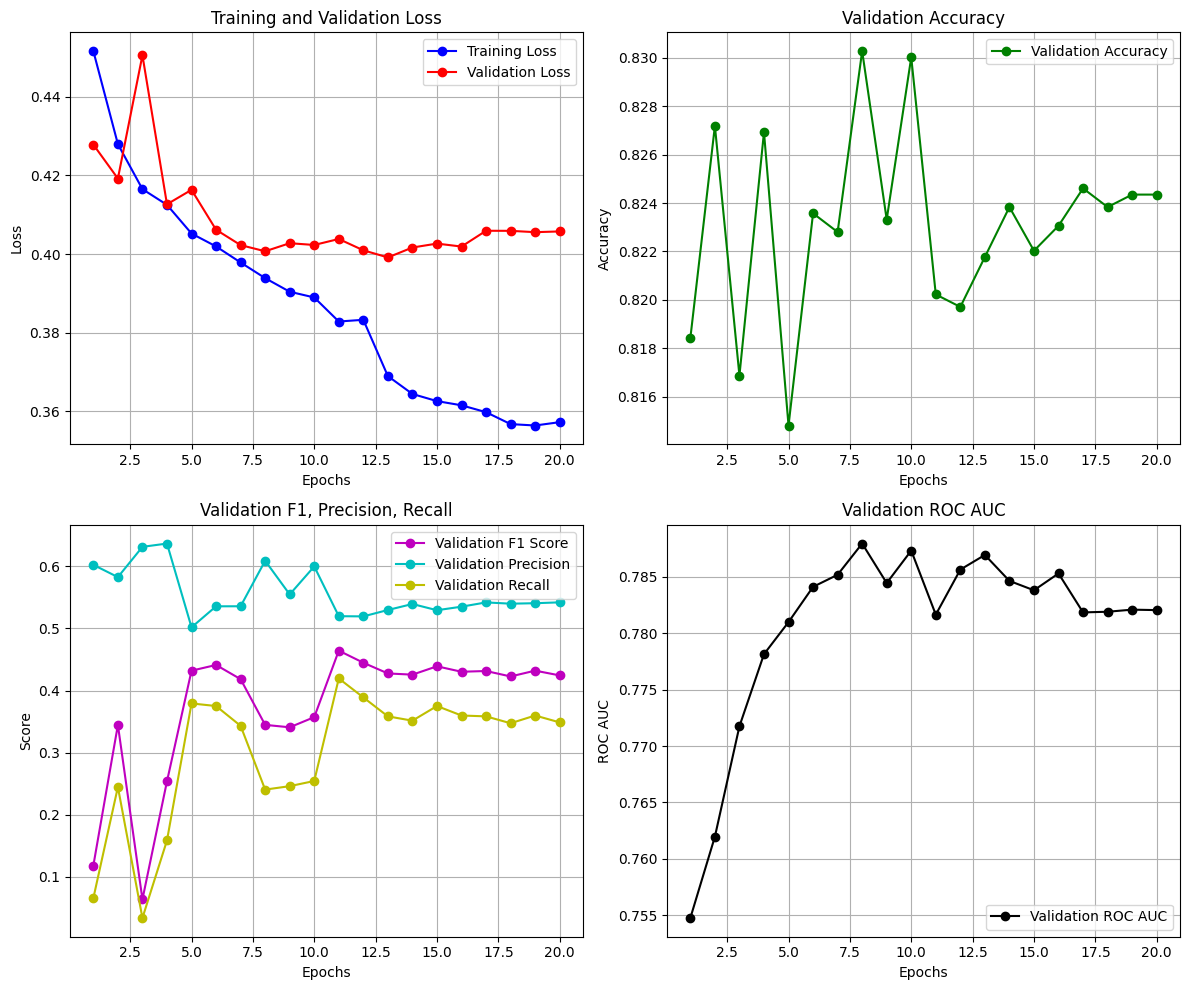

In [12]:
# Jupyter Notebook 셀 예시
import matplotlib.pyplot as plt
import pickle
import os
# import sys
# sys.path.append('D:\\projects\\movie_success_predictor') # 만약 src 폴더를 인식 못하면 프로젝트 루트 추가
from src import config # config 파일 경로 등 사용 위함 (선택 사항)

# 학습 로그 파일 경로 (train.py에서 저장한 경로와 동일하게)
history_file_path = os.path.join(config.MODEL_DIR, 'training_history.pkl') # config 사용 예시
# history_file_path = 'models/training_history.pkl' # 직접 경로 지정 예시

# 학습 로그 불러오기
try:
    with open(history_file_path, 'rb') as f:
        history = pickle.load(f)
    print("Training history loaded successfully.")
except FileNotFoundError:
    print(f"Error: Training history file not found at {history_file_path}")
    print("Please run training first and ensure history is saved.")
    history = None # 오류 시 None으로 초기화
except Exception as e:
    print(f"Error loading training history: {e}")
    history = None

if history:
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(12, 10))

    # 1. 손실(Loss) 그래프
    plt.subplot(2, 2, 1)
    plt.plot(epochs, history['train_loss'], 'bo-', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # 2. 정확도(Accuracy) 그래프
    plt.subplot(2, 2, 2)
    plt.plot(epochs, history['val_accuracy'], 'go-', label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # 3. F1 점수, 정밀도, 재현율 그래프
    plt.subplot(2, 2, 3)
    plt.plot(epochs, history['val_f1'], 'mo-', label='Validation F1 Score')
    plt.plot(epochs, history['val_precision'], 'co-', label='Validation Precision')
    plt.plot(epochs, history['val_recall'], 'yo-', label='Validation Recall')
    plt.title('Validation F1, Precision, Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)

    # 4. ROC AUC 그래프
    plt.subplot(2, 2, 4)
    plt.plot(epochs, history['val_roc_auc'], 'ko-', label='Validation ROC AUC')
    plt.title('Validation ROC AUC')
    plt.xlabel('Epochs')
    plt.ylabel('ROC AUC')
    plt.legend()
    plt.grid(True)

    plt.tight_layout() # 그래프들이 겹치지 않도록 자동 조정
    plt.show()
else:
    print("Cannot plot graphs because training history is not available.")

In [13]:
# 데이터 분포 확인인
import pandas as pd
from src import config # config.py 파일 임포트
from src.dataset import MovieSuccessDataset # Dataset 클래스 임포트
import os

# 전처리된 데이터 파일 경로
processed_data_file = config.PROCESSED_DATA_PATH

if os.path.exists(processed_data_file):
    # Dataset 객체를 만들 필요 없이, pkl 파일만 로드해서 확인 가능
    df_processed = pd.read_pickle(processed_data_file)
    
    print("--- 전체 데이터셋의 클래스 분포 ---")
    print(df_processed[config.TARGET_COL].value_counts())
    print("\n--- 전체 데이터셋의 클래스 비율 ---")
    print(df_processed[config.TARGET_COL].value_counts(normalize=True)) # normalize=True는 비율로 표시

    # 만약 학습/검증 데이터를 이미 분리해서 저장했다면, 각 파일을 로드해서 확인
    # 또는 train.py에서 분리 후 확인하는 로직 추가

else:
    print(f"Error: Processed data file not found at {processed_data_file}")

--- 전체 데이터셋의 클래스 분포 ---
success
0    15785
1     3600
Name: count, dtype: int64

--- 전체 데이터셋의 클래스 비율 ---
success
0    0.814289
1    0.185711
Name: proportion, dtype: float64
